In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
 
import seaborn as sns
import json
import pandas as pd

from IPython.core.debugger import Tracer

In [2]:
def make_dataframe(filename, trial_id, stride = 1, stop_point=500):
    with open(filename) as jfile:
        dat = json.load(jfile)
    for i in range(len(dat)):
        dat[i] = [trial_id] + dat[i]
    stop_point = min(stop_point, len(dat)-5)
    dat = dat[:stop_point:stride]
    df = pd.DataFrame(dat, columns=['trial_id','wall_time', 'step', 'value'])
    return df

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


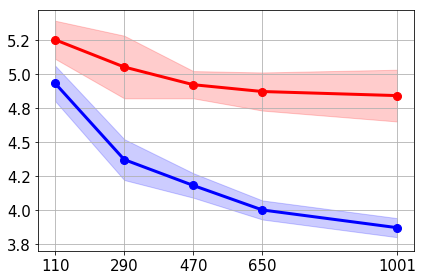

In [3]:
###############################################################
#### Figure 1 Left #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
depth = [110, 290, 470, 650, 1001]

cifar10_sgd_error = [100 - 94.75, 100 - 94.95, 100 - 95.08, 100 - 95.13, 100 - 95.16]
cifar10_srsgd_lin_error = [100 - 95.07, 100 - 95.63, 100 - 95.82, 100 - 96.00, 100 - 96.13]

cifar10_sgd_bar = [0.14, 0.23, 0.10, 0.14, 0.19]
cifar10_srsgd_lin_bar = [0.13, 0.15, 0.09, 0.07, 0.07]

cifar10_sgd_upper = []
cifar10_sgd_lower = []

cifar10_srsgd_lin_upper = []
cifar10_srsgd_lin_lower = []

for i in range(len(cifar10_sgd_error)):
    cifar10_sgd_upper.append(cifar10_sgd_error[i] + cifar10_sgd_bar[i])
    cifar10_sgd_lower.append(cifar10_sgd_error[i] - cifar10_sgd_bar[i])
    
    cifar10_srsgd_lin_upper.append(cifar10_srsgd_lin_error[i] + cifar10_srsgd_lin_bar[i])
    cifar10_srsgd_lin_lower.append(cifar10_srsgd_lin_error[i] - cifar10_srsgd_lin_bar[i])
    
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.plot(depth, cifar10_sgd_error, 'r-o', linewidth=3, markersize=8, label='SGD')
plt.fill_between(depth, cifar10_sgd_lower, cifar10_sgd_upper,
                 color='red', alpha=0.2)

ax.plot(depth, cifar10_srsgd_lin_error, 'b-o', linewidth=3, markersize=8, label='SRSGD')
plt.fill_between(depth, cifar10_srsgd_lin_lower, cifar10_srsgd_lin_upper,
                 color='blue', alpha=0.2)

xsticks = [110, 290, 470, 650, 1001]
plt.setp(ax, xticks=depth, xticklabels=depth)
# plt.xticks(np.arange(min(cifar10_srsgd_lin_error), max(cifar10_sgd_error)+1, 1.0))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylim(3.7)
# ax.set_xlim(110)
ax.grid()
#ax.legend()
fig.show()
fig.savefig('./figures/cifar10_depth_vs_error_srsgd_published.pdf')

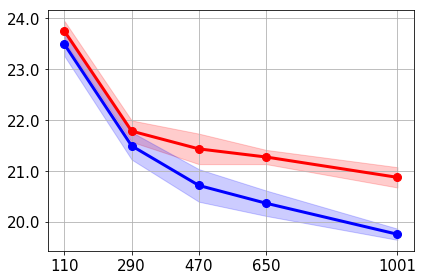

In [4]:
###############################################################
#### Figure 1 Middle #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
depth = [110, 290, 470, 650, 1001]
cifar100_sgd_error = [100 - 76.25, 100 - 78.22, 100 - 78.57, 100 - 78.73, 100 - 79.13]
cifar100_srsgd_lin_error = [100 - 76.51, 100 - 78.51, 100 - 79.29, 100 - 79.64, 100 - 80.25]

cifar100_sgd_bar = [0.20, 0.21, 0.30, 0.14, 0.20]
cifar100_srsgd_lin_bar = [0.23, 0.27, 0.32, 0.25, 0.11]

cifar100_sgd_upper = []
cifar100_sgd_lower = []

cifar100_srsgd_lin_upper = []
cifar100_srsgd_lin_lower = []

for i in range(len(cifar100_sgd_error)):
    cifar100_sgd_upper.append(cifar100_sgd_error[i] + cifar100_sgd_bar[i])
    cifar100_sgd_lower.append(cifar100_sgd_error[i] - cifar100_sgd_bar[i])
    
    cifar100_srsgd_lin_upper.append(cifar100_srsgd_lin_error[i] + cifar100_srsgd_lin_bar[i])
    cifar100_srsgd_lin_lower.append(cifar100_srsgd_lin_error[i] - cifar100_srsgd_lin_bar[i])

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(depth, cifar100_sgd_error, 'r-o', linewidth=3, markersize=8, label='SGD')
plt.fill_between(depth, cifar100_sgd_lower, cifar100_sgd_upper,
                 color='red', alpha=0.2)

ax.plot(depth, cifar100_srsgd_lin_error, 'b-o', linewidth=3, markersize=8, label='SRSGD-linear')
plt.fill_between(depth, cifar100_srsgd_lin_lower, cifar100_srsgd_lin_upper,
                 color='blue', alpha=0.2)

xsticks = [110, 290, 470, 650, 1001]
plt.setp(ax, xticks=depth, xticklabels=depth)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/cifar100_depth_vs_error_srsgd_published.pdf')

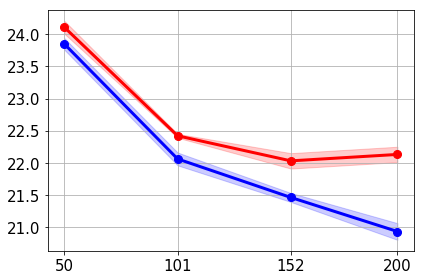

In [5]:
###############################################################
#### Figure 1 Right #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

depth = [50, 101, 152, 200]

imagenet_sgd_error = [100 - 75.89, 100 - 77.58, 100 - 77.97, 100 - 77.87]
imagenet_srsgd_error = [100 - 76.15, 100 - 77.94, 100 - 78.54, 100 - 79.07]

imagenet_sgd_bar = [0.1, 0.03, 0.12, 0.12]
imagenet_srsgd_bar = [0.09, 0.1, 0.07, 0.13]

imagenet_sgd_upper = []
imagenet_sgd_lower = []

imagenet_srsgd_upper = []
imagenet_srsgd_lower = []

for i in range(len(imagenet_sgd_error)):
    imagenet_sgd_upper.append(imagenet_sgd_error[i] + imagenet_sgd_bar[i])
    imagenet_sgd_lower.append(imagenet_sgd_error[i] - imagenet_sgd_bar[i])
    
    imagenet_srsgd_upper.append(imagenet_srsgd_error[i] + imagenet_srsgd_bar[i])
    imagenet_srsgd_lower.append(imagenet_srsgd_error[i] - imagenet_srsgd_bar[i])
    
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.plot(depth, imagenet_sgd_error, 'r-o', linewidth=3, markersize=8, label='SGD')
plt.fill_between(depth, imagenet_sgd_lower, imagenet_sgd_upper,
                 color='red', alpha=0.2)

ax.plot(depth, imagenet_srsgd_error, 'b-o', linewidth=3, markersize=8, label='SRSGD')
plt.fill_between(depth, imagenet_srsgd_lower, imagenet_srsgd_upper,
                 color='blue', alpha=0.2)

xsticks = [50, 101, 152, 200]
plt.setp(ax, xticks=depth, xticklabels=depth)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/imagenet_depth_vs_error_srsgd_published.pdf')

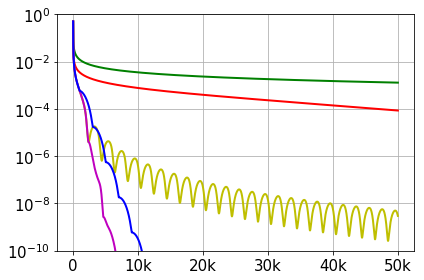

In [6]:
###############################################################
#### Figure 2 Left #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

GD = np.loadtxt('result4plot/GD_Quadratic_Exact_Oracle.txt');
MGD = np.loadtxt('result4plot/MGD_Quadratic_Exact_Oracle.txt');
NAG = np.loadtxt('result4plot/NAG_Quadratic_Exact_Oracle.txt');
NAGAR = np.loadtxt('result4plot/NAGAR_Quadratic_Exact_Oracle.txt');
NAGSR = np.loadtxt('result4plot/NAGSR_Quadratic_Exact_Oracle.txt');

from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

t = list(range(1,len(GD)+1))

fig, ax = plt.subplots()
ax.plot(t, GD, 'g', linewidth=2, markersize=8, label='GD')
ax.plot(t, MGD, 'r', linewidth=2, markersize=8, label='GD + Momentum')
ax.plot(t, NAG, 'y', linewidth=2, markersize=8, label='NAG')
ax.plot(t, NAGAR, 'm', linewidth=2, markersize=8, label='ARNAG')
ax.plot(t, NAGSR, 'b', linewidth=2, markersize=8, label='SRNAG')
ax.grid()
xsticks = [0, 10000, 20000, 30000, 40000, 50000]
xticklabels = ['0','10k', '20k', '30k', '40k', '50k']
plt.setp(ax, xticks=xsticks, xticklabels=xticklabels)
ax.set_ylim(1e-10, 1e0)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set(yscale="log")
fig.show()
fig.savefig('./figures/quadratic_exact_oracle.png')

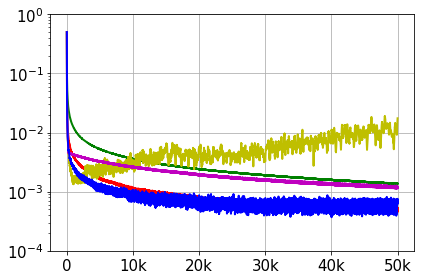

In [7]:
###############################################################
#### Figure 2 Middle #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
GD = np.loadtxt('result4plot/GD_Quadratic_Const_Noise.txt');
MGD = np.loadtxt('result4plot/MGD_Quadratic_Const_Noise.txt');
NAG = np.loadtxt('result4plot/NAG_Quadratic_Const_Noise.txt');
NAGAR = np.loadtxt('result4plot/NAGAR_Quadratic_Const_Noise.txt');
NAGSR = np.loadtxt('result4plot/NAGSR_Quadratic_Const_Noise.txt');

from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

t = list(range(1,len(GD)+1))

fig, ax = plt.subplots()
ax.plot(t, GD, 'g', linewidth=2, markersize=8, label='GD')
ax.plot(t, MGD, 'r', linewidth=2, markersize=8, label='GD + Momentum')
ax.plot(t, NAG, 'y', linewidth=2, markersize=8, label='NAG')
ax.plot(t, NAGAR, 'm', linewidth=2, markersize=8, label='ARNAG')
ax.plot(t, NAGSR, 'b', linewidth=2, markersize=8, label='SRNAG')
ax.grid()
xsticks = [0, 10000, 20000, 30000, 40000, 50000]
xticklabels = ['0','10k', '20k', '30k', '40k', '50k']
plt.setp(ax, xticks=xsticks, xticklabels=xticklabels)
ax.set_ylim(1e-4, 1e0)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set(yscale="log")
fig.show()
fig.savefig('./figures/quadratic_const_noise.png')

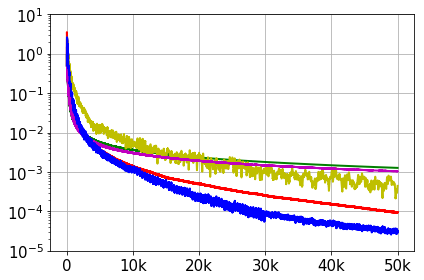

In [8]:
###############################################################
#### Figure 2 Right #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
GD = np.loadtxt('result4plot/GD_Quadratic_Decaying_Noise.txt');
MGD = np.loadtxt('result4plot/MGD_Quadratic_Decaying_Noise.txt');
NAG = np.loadtxt('result4plot/NAG_Quadratic_Decaying_Noise.txt');
NAGAR = np.loadtxt('result4plot/NAGAR_Quadratic_Decaying_Noise.txt');
NAGSR = np.loadtxt('result4plot/NAGSR_Quadratic_Decaying_Noise.txt');

from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

t = list(range(1,len(GD)+1))

fig, ax = plt.subplots()
ax.plot(t, GD, 'g', linewidth=2, markersize=8, label='GD')
ax.plot(t, MGD, 'r', linewidth=2, markersize=8, label='GD + Momentum')
ax.plot(t, NAG, 'y', linewidth=2, markersize=8, label='NAG')
ax.plot(t, NAGAR, 'm', linewidth=2, markersize=8, label='ARNAG')
ax.plot(t, NAGSR, 'b', linewidth=2, markersize=8, label='SRNAG')
ax.grid()
xsticks = [0, 10000, 20000, 30000, 40000, 50000]
xticklabels = ['0','10k', '20k', '30k', '40k', '50k']
plt.setp(ax, xticks=xsticks, xticklabels=xticklabels)
ax.set_ylim(1e-5, 1e1)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set(yscale="log")
fig.show()
fig.savefig('./figures/quadratic_decaying_noise.png')

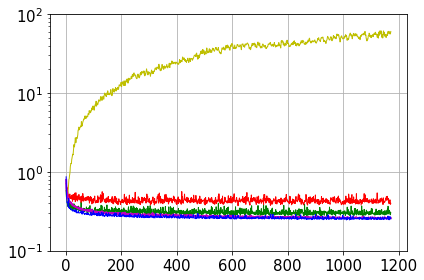

In [9]:
###############################################################
#### Figure 3 #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
SGD = np.loadtxt('result4plot/Training_loss_SGD.txt');
MGD = np.loadtxt('result4plot/Training_loss_MGD.txt');
NAG = np.loadtxt('result4plot/Training_loss_NAG.txt');
NAGAR = np.loadtxt('result4plot/Training_loss_ADNAG.txt');
NAGSR = np.loadtxt('result4plot/Training_loss_SRNAG.txt');

from matplotlib.ticker import FormatStrFormatter, ScalarFormatter

t = list(range(1,len(SGD)+1))

fig, ax = plt.subplots()
ax.plot(t, SGD, 'g', linewidth=1, markersize=8, label='GD')
ax.plot(t, MGD, 'r', linewidth=1, markersize=8, label='GD + Momentum')
ax.plot(t, NAG, 'y', linewidth=1, markersize=8, label='NAG')
ax.plot(t, NAGAR, 'm', linewidth=2, markersize=8, label='ARNAG')
ax.plot(t, NAGSR, 'b', linewidth=1, markersize=8, label='SRNAG')
ax.grid()
ax.set_ylim(1e-1, 1e2)
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set(yscale="log")
fig.show()
fig.savefig('./figures/logistic_regression.png')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


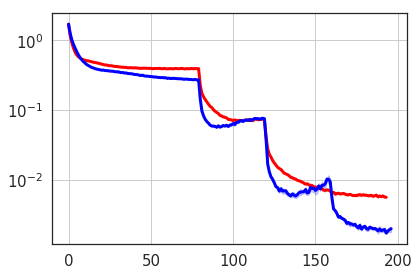

In [10]:
###############################################################
#### Figure 4 Left #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_preact1001_cifar10_published.pdf'

#sgd
sgd = ['./result4plot/run-preresnet1001-sgd-0_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-sgd-1_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-sgd-2_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-sgd-3_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-sgd-4_train_loss_preresnet20_srsgd-tag-train_loss.json']
keys_sgd = ['run0','run1','run2', 'run3','run4']
id_sgd = 'SGD'
stop_point_sgd = 197

# srsgd
srsgd = ['./result4plot/run-preresnet1001-srsgd-0_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-srsgd-1_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-srsgd-2_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-srsgd-3_train_loss_preresnet20_srsgd-tag-train_loss.json',
                        './result4plot/run-preresnet1001-srsgd-4_train_loss_preresnet20_srsgd-tag-train_loss.json']
keys_srsgd = ['run0','run1','run2', 'run3','run4']
id_srsgd = 'SRSGD'
stop_point_srsgd = 197

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(90, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=3, markersize=8)
    return sns_plot, df_min

sns_plot, min_sgd = plot_line(sgd, keys_sgd, id_sgd, stride=1, stop_point=stop_point_sgd, color='red')
sns_plot, min_srsgd = plot_line(srsgd, keys_srsgd, id_srsgd, stride=1, stop_point=stop_point_srsgd, color='blue')

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=15)
sns_plot.tick_params(axis='both', which='minor', labelsize=15)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

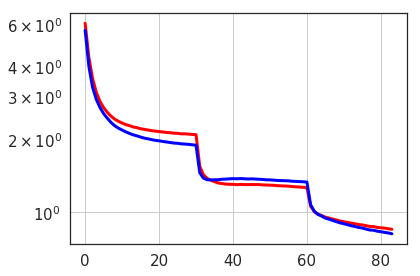

In [11]:
###############################################################
#### Figure 4 Right #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_resnet200_imagenet_published.pdf'

#sgd
sgd = ['./result4plot/run-imagenet_resnet200_basline_sgd_lmdb_0_train_loss_resnet200_srsgd-tag-train_loss.json',]
keys_sgd = ['run0',]
id_sgd = 'SGD'
stop_point_sgd = 84

# srsgd
srsgd = ['./result4plot/run-imagenet_resnet200_lin_40_3rd_lineardecay_k_2_srsgd_0_train_loss_resnet200_srsgd-tag-train_loss.json',]
keys_srsgd = ['run0',]
id_srsgd = 'SRSGD'
stop_point_srsgd = 84

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(90, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
        # print(np.argmin(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=3, markersize=8)
    return sns_plot, df_min

sns_plot, min_sgd = plot_line(sgd, keys_sgd, id_sgd, stride=1, stop_point=stop_point_sgd, color='red')
sns_plot, min_srsgd = plot_line(srsgd, keys_srsgd, id_srsgd, stride=1, stop_point=stop_point_srsgd, color='blue')

sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=15)
sns_plot.tick_params(axis='both', which='minor', labelsize=15)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

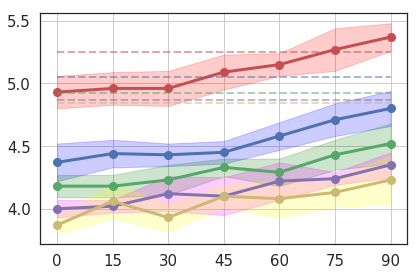

In [12]:
###############################################################
#### Figure 5 Left #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [0, 15, 30, 45, 60, 75, 90]

cifar10_srsgd_error_110 = [4.93, 4.96, 4.96, 5.09, 5.15, 5.27, 5.37]
cifar10_srsgd_error_290 = [4.37, 4.44, 4.43, 4.45, 4.58, 4.71, 4.80]
cifar10_srsgd_error_470 = [4.18, 4.18, 4.23, 4.33, 4.29, 4.43, 4.52]
cifar10_srsgd_error_650 = [4.00, 4.02, 4.12, 4.10, 4.22, 4.24, 4.35]
cifar10_srsgd_error_1001 = [3.87, 4.06, 3.93, 4.10, 4.08, 4.13, 4.23]

cifar10_srsgd_bar_110 = [0.13, 0.13, 0.14, 0.14, 0.09, 0.17, 0.11]
cifar10_srsgd_bar_290 = [0.15, 0.11, 0.09, 0.09, 0.11, 0.13, 0.14]
cifar10_srsgd_bar_470 = [0.09, 0.09, 0.12, 0.07, 0.11, 0.12, 0.16]
cifar10_srsgd_bar_650 = [0.07, 0.05, 0.14, 0.15, 0.15, 0.05, 0.10]
cifar10_srsgd_bar_1001 = [0.07, 0.14, 0.11, 0.09, 0.15, 0.12, 0.19]


cifar10_srsgd_upper_110 = []
cifar10_srsgd_lower_110 = []
cifar10_srsgd_upper_290 = []
cifar10_srsgd_lower_290 = []
cifar10_srsgd_upper_470 = []
cifar10_srsgd_lower_470 = []
cifar10_srsgd_upper_650 = []
cifar10_srsgd_lower_650 = []
cifar10_srsgd_upper_1001 = []
cifar10_srsgd_lower_1001 = []

for i in range(len(step)):
    cifar10_srsgd_upper_110.append(cifar10_srsgd_error_110[i] + cifar10_srsgd_bar_110[i])
    cifar10_srsgd_lower_110.append(cifar10_srsgd_error_110[i] - cifar10_srsgd_bar_110[i])
    cifar10_srsgd_upper_290.append(cifar10_srsgd_error_290[i] + cifar10_srsgd_bar_290[i])
    cifar10_srsgd_lower_290.append(cifar10_srsgd_error_290[i] - cifar10_srsgd_bar_290[i])
    cifar10_srsgd_upper_470.append(cifar10_srsgd_error_470[i] + cifar10_srsgd_bar_470[i])
    cifar10_srsgd_lower_470.append(cifar10_srsgd_error_470[i] - cifar10_srsgd_bar_470[i])
    cifar10_srsgd_upper_650.append(cifar10_srsgd_error_650[i] + cifar10_srsgd_bar_650[i])
    cifar10_srsgd_lower_650.append(cifar10_srsgd_error_650[i] - cifar10_srsgd_bar_650[i])
    cifar10_srsgd_upper_1001.append(cifar10_srsgd_error_1001[i] + cifar10_srsgd_bar_1001[i])
    cifar10_srsgd_lower_1001.append(cifar10_srsgd_error_1001[i] - cifar10_srsgd_bar_1001[i])
    
baseline_110 = [100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75]
baseline_290 = [100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95]
baseline_470 = [100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08]
baseline_650 = [100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13]
baseline_1001 = [100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16]

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, cifar10_srsgd_error_110, 'r-o', linewidth=3, markersize=8, label='Pre-ResNet-110')
plt.fill_between(step, cifar10_srsgd_lower_110, cifar10_srsgd_upper_110,
                 color='red', alpha=0.2)

ax.plot(step, baseline_110, 'r--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-110')

ax.plot(step, cifar10_srsgd_error_290, 'b-o', linewidth=3, markersize=8, label='Pre-ResNet-290')
plt.fill_between(step, cifar10_srsgd_lower_290, cifar10_srsgd_upper_290,
                 color='blue', alpha=0.2)

ax.plot(step, baseline_290, 'b--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-290')

ax.plot(step, cifar10_srsgd_error_470, 'g-o', linewidth=3, markersize=8, label='Pre-ResNet-470')
plt.fill_between(step, cifar10_srsgd_lower_470, cifar10_srsgd_upper_470,
                 color='green', alpha=0.2)

ax.plot(step, baseline_470, 'g--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-470')

ax.plot(step, cifar10_srsgd_error_650, 'm-o', linewidth=3, markersize=8, label='Pre-ResNet-650')
plt.fill_between(step, cifar10_srsgd_lower_650, cifar10_srsgd_upper_650,
                 color='magenta', alpha=0.2)

ax.plot(step, baseline_650, 'm--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-650')

ax.plot(step, cifar10_srsgd_error_1001, 'y-o', linewidth=3, markersize=8, label='Pre-ResNet-1001')
plt.fill_between(step, cifar10_srsgd_lower_1001, cifar10_srsgd_upper_1001,
                 color='yellow', alpha=0.2)

ax.plot(step, baseline_1001, 'y--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-1001')

plt.setp(ax, xticks=step, xticklabels=step)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/cifar10_error_vs_train_epoch.pdf')

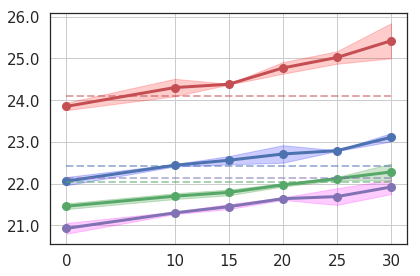

In [13]:
###############################################################
#### Figure 5 Right #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [0, 10, 15, 20, 25, 30]

im_srsgd_error_50 = [23.85, 24.30, 24.38, 24.77, 25.02, 25.42]
im_srsgd_error_101 = [22.06, 22.44, 22.56, 22.71, 22.79, 23.11]
im_srsgd_error_152 = [21.46, 21.70, 21.79, 21.97, 22.12, 22.28]
im_srsgd_error_200 = [20.93, 21.30, 21.45, 21.64, 21.69, 21.92]

im_srsgd_bar_50 = [0.09, 0.21, 0.01, 0.14, 0.15, 0.42]
im_srsgd_bar_101 = [0.10, 0.03, 0.10, 0.21, 0.01, 0.10]
im_srsgd_bar_152 = [0.07, 0.07, 0.07, 0.04, 0.04, 0.20]
im_srsgd_bar_200 = [0.13, 0.03, 0.06, 0.03, 0.20, 0.17]


im_srsgd_upper_50 = []
im_srsgd_lower_50 = []
im_srsgd_upper_101 = []
im_srsgd_lower_101 = []
im_srsgd_upper_152 = []
im_srsgd_lower_152 = []
im_srsgd_upper_200 = []
im_srsgd_lower_200 = []


for i in range(len(step)):
    im_srsgd_upper_50.append(im_srsgd_error_50[i] + im_srsgd_bar_50[i])
    im_srsgd_lower_50.append(im_srsgd_error_50[i] - im_srsgd_bar_50[i])
    
    im_srsgd_upper_101.append(im_srsgd_error_101[i] + im_srsgd_bar_101[i])
    im_srsgd_lower_101.append(im_srsgd_error_101[i] - im_srsgd_bar_101[i])
    
    im_srsgd_upper_152.append(im_srsgd_error_152[i] + im_srsgd_bar_152[i])
    im_srsgd_lower_152.append(im_srsgd_error_152[i] - im_srsgd_bar_152[i])
    
    im_srsgd_upper_200.append(im_srsgd_error_200[i] + im_srsgd_bar_200[i])
    im_srsgd_lower_200.append(im_srsgd_error_200[i] - im_srsgd_bar_200[i])
    
    
baseline_50 = [24.11, 24.11, 24.11, 24.11, 24.11, 24.11]
baseline_101 = [22.42, 22.42, 22.42, 22.42, 22.42, 22.42]
baseline_152 = [22.03, 22.03, 22.03, 22.03, 22.03, 22.03]
baseline_200 = [22.13, 22.13, 22.13, 22.13, 22.13, 22.13]

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, im_srsgd_error_50, 'r-o', linewidth=3, markersize=8, label='ResNet-50')
plt.fill_between(step, im_srsgd_lower_50, im_srsgd_upper_50,
                 color='red', alpha=0.2)

ax.plot(step, baseline_50, 'r--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-50')

ax.plot(step, im_srsgd_error_101, 'b-o', linewidth=3, markersize=8, label='ResNet-101')
plt.fill_between(step, im_srsgd_lower_101, im_srsgd_upper_101,
                 color='blue', alpha=0.2)

ax.plot(step, baseline_101, 'b--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-101')

ax.plot(step, im_srsgd_error_152, 'g-o', linewidth=3, markersize=8, label='ResNet-152')
plt.fill_between(step, im_srsgd_lower_152, im_srsgd_upper_152,
                 color='green', alpha=0.2)

ax.plot(step, baseline_152, 'g--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-152')

ax.plot(step, im_srsgd_error_200, 'm-o', linewidth=3, markersize=8, label='ResNet-200')
plt.fill_between(step, im_srsgd_lower_200, im_srsgd_upper_200,
                 color='magenta', alpha=0.2)

ax.plot(step, baseline_200, 'm--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-200')


plt.setp(ax, xticks=step, xticklabels=step)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlim(110)
#ax.set_ylim(3.7)
ax.grid()
#ax.legend()
fig.show()
fig.savefig('./figures/imagenet_error_vs_train_epoch.pdf')

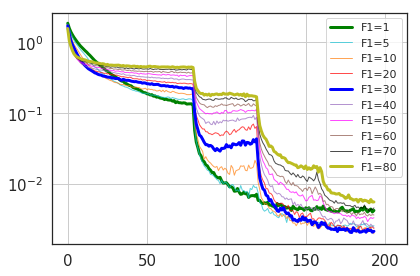

In [14]:
###############################################################
#### Figure 6 Left #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_vs_f_preresnet290_cifar10_published.pdf'

keys = ['run0',]
stop_point = 200
#srsgd
f1 = ['./result4plot/run-preresnet290-n-1_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id1 = 'F1=1'

f5 = ['./result4plot/run-preresnet290-n-5_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id5 = 'F1=5'

f10 = ['./result4plot/run-preresnet290-n-10_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id10 = 'F1=10'

f20 = ['./result4plot/run-preresnet290-n-20_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id20 = 'F1=20'

f30 = ['./result4plot/run-preresnet290-n-30_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id30 = 'F1=30'

f40 = ['./result4plot/run-preresnet290-n-40_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id40 = 'F1=40'

f50 = ['./result4plot/run-preresnet290-n-50_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id50 = 'F1=50'

f60 = ['./result4plot/run-preresnet290-n-60_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id60 = 'F1=60'

f70 = ['./result4plot/run-preresnet290-n-70_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id70 = 'F1=70'

f80 = ['./result4plot/run-preresnet290-n-80_train_loss_preresnet20_srsgd-tag-train_loss.json',]
id80 = 'F1=80'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(200, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(f1, keys, id1, stride=1, stop_point=stop_point, color='green', linewidth=3, alpha=1.0)
sns_plot, _ = plot_line(f5, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f10, keys, id10, stride=1, stop_point=stop_point, color='tab:orange', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f20, keys, id20, stride=1, stop_point=stop_point, color='red', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f30, keys, id30, stride=1, stop_point=stop_point, color='blue', linewidth=3, alpha=1.0)
sns_plot, _ = plot_line(f40, keys, id40, stride=1, stop_point=stop_point, color='tab:purple', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f50, keys, id50, stride=1, stop_point=stop_point, color='magenta', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f60, keys, id60, stride=1, stop_point=stop_point, color='tab:brown', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f70, keys, id70, stride=1, stop_point=stop_point, color='black', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f80, keys, id80, stride=1, stop_point=stop_point, color='tab:olive', linewidth=3, alpha=1.0)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=15)
sns_plot.tick_params(axis='both', which='minor', labelsize=15)
sns_plot.set_xlim(right=214)
sns_plot.legend().set_visible(True)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

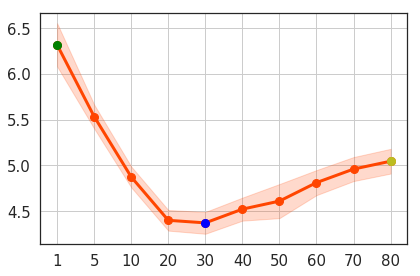

In [15]:
###############################################################
#### Figure 6 Right #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
steplabels = ['1', '5', '10', '20', '30', '40', '50', '60', '70', '80']

im_srsgd_error = [6.318, 5.534, 4.874, 4.4, 4.372, 4.522, 4.61, 4.812, 4.96, 5.046]

im_srsgd_bar = [0.2359449088, 0.1304990421, 0.1137101579, 0.1125610945, 0.1191637529, 0.1257775815, 0.1861451047, 0.136821051, 0.1311487705, 0.1350185172]

im_srsgd_upper = []
im_srsgd_lower = []

for i in range(len(step)):
    im_srsgd_upper.append(im_srsgd_error[i] + im_srsgd_bar[i])
    im_srsgd_lower.append(im_srsgd_error[i] - im_srsgd_bar[i])

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, im_srsgd_error, '-o', color='orangered', linewidth=3, markersize=8)
plt.fill_between(step, im_srsgd_lower, im_srsgd_upper,
                 color='orangered', alpha=0.2)

ax.plot([1], [6.318], 'o', color='green', linewidth=3, markersize=8)
ax.plot([5], [4.372], 'o', color='blue', linewidth=3, markersize=8)
ax.plot([10], [5.046], 'o', color='tab:olive', linewidth=3, markersize=8)

plt.setp(ax, xticks=step, xticklabels=steplabels)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/cifar10_preresnet290_error_vs_f.pdf')

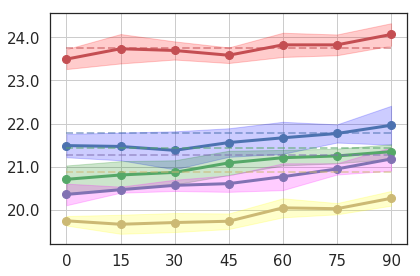

In [16]:
###############################################################
#### Figure 1 in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [0, 15, 30, 45, 60, 75, 90]
step = step[::-1]

cifar100_srsgd_error_110 = [24.06, 23.82, 23.82, 23.58, 23.69, 23.73, 23.49]
cifar100_srsgd_error_290 = [21.96, 21.77, 21.67, 21.56, 21.38, 21.47, 21.49]
cifar100_srsgd_error_470 = [21.35, 21.25, 21.21, 21.09, 20.87, 20.81, 20.71]
cifar100_srsgd_error_650 = [21.18, 20.95, 20.77, 20.61, 20.57, 20.47, 20.36]
cifar100_srsgd_error_1001 = [20.27, 20.03, 20.05, 19.74, 19.71, 19.67, 19.75]

cifar100_srsgd_bar_110 = [0.26, 0.24, 0.28, 0.18, 0.21, 0.34, 0.23]
cifar100_srsgd_bar_290 = [0.45, 0.21, 0.37, 0.33, 0.44, 0.32, 0.27]
cifar100_srsgd_bar_470 = [0.17, 0.17, 0.18, 0.28, 0.28, 0.32, 0.32]
cifar100_srsgd_bar_650 = [0.27, 0.13, 0.31, 0.19, 0.13, 0.07, 0.25]
cifar100_srsgd_bar_1001 = [0.17, 0.13, 0.22, 0.18, 0.22, 0.22, 0.11]


cifar100_srsgd_upper_110 = []
cifar100_srsgd_lower_110 = []
cifar100_srsgd_upper_290 = []
cifar100_srsgd_lower_290 = []
cifar100_srsgd_upper_470 = []
cifar100_srsgd_lower_470 = []
cifar100_srsgd_upper_650 = []
cifar100_srsgd_lower_650 = []
cifar100_srsgd_upper_1001 = []
cifar100_srsgd_lower_1001 = []

for i in range(len(step)):
    cifar100_srsgd_upper_110.append(cifar100_srsgd_error_110[i] + cifar100_srsgd_bar_110[i])
    cifar100_srsgd_lower_110.append(cifar100_srsgd_error_110[i] - cifar100_srsgd_bar_110[i])
    cifar100_srsgd_upper_290.append(cifar100_srsgd_error_290[i] + cifar100_srsgd_bar_290[i])
    cifar100_srsgd_lower_290.append(cifar100_srsgd_error_290[i] - cifar100_srsgd_bar_290[i])
    cifar100_srsgd_upper_470.append(cifar100_srsgd_error_470[i] + cifar100_srsgd_bar_470[i])
    cifar100_srsgd_lower_470.append(cifar100_srsgd_error_470[i] - cifar100_srsgd_bar_470[i])
    cifar100_srsgd_upper_650.append(cifar100_srsgd_error_650[i] + cifar100_srsgd_bar_650[i])
    cifar100_srsgd_lower_650.append(cifar100_srsgd_error_650[i] - cifar100_srsgd_bar_650[i])
    cifar100_srsgd_upper_1001.append(cifar100_srsgd_error_1001[i] + cifar100_srsgd_bar_1001[i])
    cifar100_srsgd_lower_1001.append(cifar100_srsgd_error_1001[i] - cifar100_srsgd_bar_1001[i])
    
baseline_110 = [23.75, 23.75, 23.75, 23.75, 23.75, 23.75, 23.75]
baseline_290 = [21.78, 21.78, 21.78, 21.78, 21.78, 21.78, 21.78]
baseline_470 = [21.43, 21.43, 21.43, 21.43, 21.43, 21.43, 21.43]
baseline_650 = [21.27, 21.27, 21.27, 21.27, 21.27, 21.27, 21.27]
baseline_1001 = [20.87, 20.87, 20.87, 20.87, 20.87, 20.87, 20.87]

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, cifar100_srsgd_error_110, 'r-o', linewidth=3, markersize=8, label='Pre-ResNet-110')
plt.fill_between(step, cifar100_srsgd_lower_110, cifar100_srsgd_upper_110,
                 color='red', alpha=0.2)

ax.plot(step, baseline_110, 'r--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-110')

ax.plot(step, cifar100_srsgd_error_290, 'b-o', linewidth=3, markersize=8, label='Pre-ResNet-290')
plt.fill_between(step, cifar100_srsgd_lower_290, cifar100_srsgd_upper_290,
                 color='blue', alpha=0.2)

ax.plot(step, baseline_290, 'b--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-290')

ax.plot(step, cifar100_srsgd_error_470, 'g-o', linewidth=3, markersize=8, label='Pre-ResNet-470')
plt.fill_between(step, cifar100_srsgd_lower_470, cifar100_srsgd_upper_470,
                 color='green', alpha=0.2)

ax.plot(step, baseline_470, 'g--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-470')

ax.plot(step, cifar100_srsgd_error_650, 'm-o', linewidth=3, markersize=8, label='Pre-ResNet-650')
plt.fill_between(step, cifar100_srsgd_lower_650, cifar100_srsgd_upper_650,
                 color='magenta', alpha=0.2)

ax.plot(step, baseline_650, 'm--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-650')

ax.plot(step, cifar100_srsgd_error_1001, 'y-o', linewidth=3, markersize=8, label='Pre-ResNet-1001')
plt.fill_between(step, cifar100_srsgd_lower_1001, cifar100_srsgd_upper_1001,
                 color='yellow', alpha=0.2)

ax.plot(step, baseline_1001, 'y--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-1001')

plt.setp(ax, xticks=step, xticklabels=step)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/cifar100_error_vs_train_epoch.pdf')

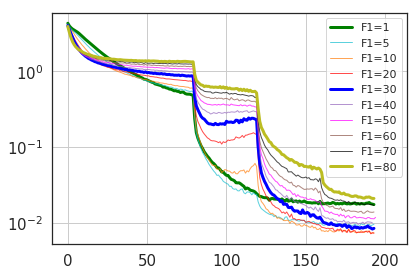

In [17]:
###############################################################
#### Figure 2 Left in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_vs_f_preresnet290_cifar100_published.pdf'

keys = ['run0',]
stop_point = 200
#srsgd
f1 = ['./result4plot/run-preresnet290-n-1_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id1 = 'F1=1'

f2 = ['./result4plot/run-preresnet290-n-2_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id2 = 'F1=2'

f5 = ['./result4plot/run-preresnet290-n-5_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id5 = 'F1=5'

f7 = ['./result4plot/run-preresnet290-n-7_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id7 = 'F1=7'

f10 = ['./result4plot/run-preresnet290-n-10_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id10 = 'F1=10'

f20 = ['./result4plot/run-preresnet290-n-20_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id20 = 'F1=20'

f30 = ['./result4plot/run-preresnet290-n-30_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id30 = 'F1=30'

f40 = ['./result4plot/run-preresnet290-n-40_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id40 = 'F1=40'

f50 = ['./result4plot/run-preresnet290-n-50_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id50 = 'F1=50'

f60 = ['./result4plot/run-preresnet290-n-60_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id60 = 'F1=60'

f70 = ['./result4plot/run-preresnet290-n-70_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id70 = 'F1=70'

f80 = ['./result4plot/run-preresnet290-n-80_train_loss_preresnet20_srsgd-tag-train_loss_cifar100.json',]
id80 = 'F1=80'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(200, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(f1, keys, id1, stride=1, stop_point=stop_point, color='green', linewidth=3, alpha=1.0)
sns_plot, _ = plot_line(f5, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f10, keys, id10, stride=1, stop_point=stop_point, color='tab:orange', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f20, keys, id20, stride=1, stop_point=stop_point, color='red', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f30, keys, id30, stride=1, stop_point=stop_point, color='blue', linewidth=3, alpha=1.0)
sns_plot, _ = plot_line(f40, keys, id40, stride=1, stop_point=stop_point, color='tab:purple', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f50, keys, id50, stride=1, stop_point=stop_point, color='magenta', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f60, keys, id60, stride=1, stop_point=stop_point, color='tab:brown', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f70, keys, id70, stride=1, stop_point=stop_point, color='black', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f80, keys, id80, stride=1, stop_point=stop_point, color='tab:olive', linewidth=3, alpha=1.0)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=15)
sns_plot.tick_params(axis='both', which='minor', labelsize=15)
sns_plot.set_xlim(right=214)
sns_plot.legend().set_visible(True)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

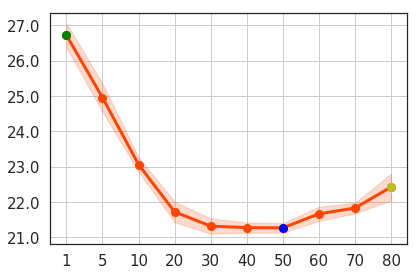

In [18]:
###############################################################
#### Figure 2 Right in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
steplabels = ['1', '5', '10', '20', '30', '40', '50', '60', '70', '80']

im_srsgd_error = [26.7225, 24.9575, 23.0625, 21.7225, 21.32, 21.2775, 21.27, 21.6675, 21.8325, 22.425]

im_srsgd_bar = [0.3408, 0.4000, 0.2061, 0.2916, 0.2168, 0.1452, 0.1364, 0.1997, 0.1497, 0.3821]

im_srsgd_upper = []
im_srsgd_lower = []

for i in range(len(step)):
    im_srsgd_upper.append(im_srsgd_error[i] + im_srsgd_bar[i])
    im_srsgd_lower.append(im_srsgd_error[i] - im_srsgd_bar[i])

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, im_srsgd_error, '-o', color='orangered', linewidth=3, markersize=8)
plt.fill_between(step, im_srsgd_lower, im_srsgd_upper,
                 color='orangered', alpha=0.2)

ax.plot([1], [26.7225], 'o', color='green', linewidth=3, markersize=8)
ax.plot([7], [21.27], 'o', color='blue', linewidth=3, markersize=8)
ax.plot([10], [22.425], 'o', color='tab:olive', linewidth=3, markersize=8)

plt.setp(ax, xticks=step, xticklabels=steplabels)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlim(110)
#ax.set_ylim(3.7)
ax.grid()
#ax.legend()
fig.show()
fig.savefig('./figures/cifar100_preresnet290_error_vs_f.pdf')

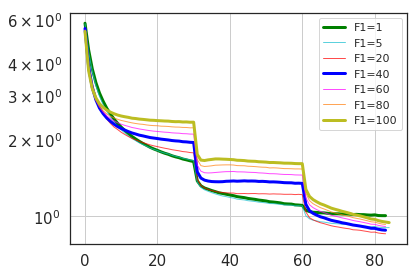

In [19]:
###############################################################
#### Figure 3 Left in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_name = 'train_loss_vs_f_resnet101_imagenet_published.pdf'

keys = ['run0',]
stop_point = 89
#srsgd
f1 = ['./result4plot/run-resnet101-n-1_train_loss_resnet101_srsgd-tag-train_loss.json',]
id1 = 'F1=1'

f5 = ['./result4plot/run-resnet101-n-5_train_loss_resnet101_srsgd-tag-train_loss.json',]
id5 = 'F1=5'

f20 = ['./result4plot/run-resnet101-n-20_train_loss_resnet101_srsgd-tag-train_loss.json',]
id20 = 'F1=20'

f40 = ['./result4plot/run-resnet101-n-40_train_loss_resnet101_srsgd-tag-train_loss.json',]
id40 = 'F1=40'

f60 = ['./result4plot/run-resnet101-n-60_train_loss_resnet101_srsgd-tag-train_loss.json',]
id60 = 'F1=60'

f80 = ['./result4plot/run-resnet101-n-80_train_loss_resnet101_srsgd-tag-train_loss.json',]
id80 = 'F1=80'

f100 = ['./result4plot/run-resnet101-n-100_train_loss_resnet101_srsgd-tag-train_loss.json',]
id100 = 'F1=100'

sns.set(style="white")
def plot_line(file_names, keys, trial_id, stride=1, stop_point=500, color=None, linewidth=1, alpha=1.0):
    df = []
    df_min = []
    for fn in file_names:
        df.append(make_dataframe(fn, trial_id, stride, stop_point=stop_point))
        stop_indx = min(89, len(df[-1]['value']))
        df_min.append(min(df[-1]['value'][:stop_indx]))
    df = pd.concat(df, keys=keys)
    sns_plot = sns.lineplot(x="step", y="value", data=df, color=color, linewidth=linewidth, markersize=8, label=trial_id, alpha=alpha)
    return sns_plot, df_min

sns_plot, _ = plot_line(f1, keys, id1, stride=1, stop_point=stop_point, color='green', linewidth=3, alpha=1.0)
sns_plot, _ = plot_line(f5, keys, id5, stride=1, stop_point=stop_point, color='tab:cyan', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f20, keys, id20, stride=1, stop_point=stop_point, color='red', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f40, keys, id40, stride=1, stop_point=stop_point, color='blue', linewidth=3, alpha=1.0)
sns_plot, _ = plot_line(f60, keys, id60, stride=1, stop_point=stop_point, color='magenta', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f80, keys, id80, stride=1, stop_point=stop_point, color='tab:orange', linewidth=1, alpha=0.7)
sns_plot, _ = plot_line(f100, keys, id100, stride=1, stop_point=stop_point, color='tab:olive', linewidth=3, alpha=1.0)


sns_plot.set_xlabel('', fontsize = 16)
sns_plot.set_ylabel('', fontsize = 16)
sns_plot.set(yscale="log")
sns_plot.grid()
sns_plot.tick_params(axis='both', which='major', labelsize=15)
sns_plot.tick_params(axis='both', which='minor', labelsize=15)
sns_plot.set_xlim(right=89)
sns_plot.legend().set_visible(True)

fig = sns_plot.get_figure()
fig.savefig(os.path.join(save_dir, save_name))

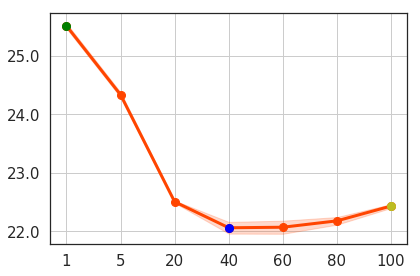

In [20]:
###############################################################
#### Figure 3 Right in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [1, 2, 3, 4, 5, 6, 7]
steplabels = ['1', '5', '20', '40', '60', '80', '100']

im_srsgd_error = [25.509, 24.332, 22.504, 22.06, 22.069, 22.178, 22.431]

im_srsgd_bar = [0.0438, 0.0424, 0.0198, 0.10, 0.1117, 0.0651, 0.0325]

im_srsgd_upper = []
im_srsgd_lower = []

for i in range(len(step)):
    im_srsgd_upper.append(im_srsgd_error[i] + im_srsgd_bar[i])
    im_srsgd_lower.append(im_srsgd_error[i] - im_srsgd_bar[i])

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, im_srsgd_error, '-o', color='orangered', linewidth=3, markersize=8)
plt.fill_between(step, im_srsgd_lower, im_srsgd_upper,
                 color='orangered', alpha=0.2)

ax.plot([1], [25.509], 'o', color='green', linewidth=3, markersize=8)
ax.plot([4], [22.06], 'o', color='blue', linewidth=3, markersize=8)
ax.plot([7], [22.431], 'o', color='tab:olive', linewidth=3, markersize=8)

plt.setp(ax, xticks=step, xticklabels=steplabels)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/imagenet_resnet101_error_vs_f.pdf')

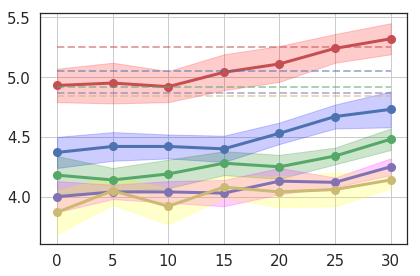

In [21]:
###############################################################
#### Figure 4 in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [0, 5, 10, 15, 20, 25, 30]

cifar10_srsgd_error_110 = [100 - 94.68, 100 - 94.76, 100 - 94.89, 100 - 94.96, 100 - 95.08, 100 - 95.05, 100 - 95.07]
cifar10_srsgd_error_110 = cifar10_srsgd_error_110[::-1]
cifar10_srsgd_error_290 = [100 - 95.27, 100 - 95.33, 100 - 95.47, 100 - 95.60, 100 - 95.58, 100 - 95.58, 100 - 95.63]
cifar10_srsgd_error_290 = cifar10_srsgd_error_290[::-1]
cifar10_srsgd_error_470 = [100 - 95.52, 100 - 95.66, 100 - 95.75, 100 - 95.72, 100 - 95.81, 100 - 95.86, 100 - 95.82]
cifar10_srsgd_error_470 = cifar10_srsgd_error_470[::-1]
cifar10_srsgd_error_650 = [100 - 95.75, 100 - 95.88, 100 - 95.87, 100 - 95.97, 100 - 95.96, 100 - 95.96, 100 - 96.00]
cifar10_srsgd_error_650 = cifar10_srsgd_error_650[::-1]
cifar10_srsgd_error_1001 = [100 - 95.86, 100 - 95.94, 100 - 95.96, 100 - 95.92, 100 - 96.08, 100 - 95.95, 100 - 96.13]
cifar10_srsgd_error_1001 = cifar10_srsgd_error_1001[::-1]

cifar10_srsgd_bar_110 = [0.14, 0.17, 0.13, 0.15, 0.15, 0.12, 0.13]
cifar10_srsgd_bar_290 = [0.13, 0.12, 0.10, 0.11, 0.09, 0.10, 0.15]
cifar10_srsgd_bar_470 = [0.16, 0.10, 0.12, 0.10, 0.10, 0.07, 0.09]
cifar10_srsgd_bar_650 = [0.13, 0.06, 0.09, 0.11, 0.11, 0.04, 0.07]
cifar10_srsgd_bar_1001 = [0.18, 0.12, 0.15, 0.09, 0.13, 0.14, 0.07]


cifar10_srsgd_upper_110 = []
cifar10_srsgd_lower_110 = []
cifar10_srsgd_upper_290 = []
cifar10_srsgd_lower_290 = []
cifar10_srsgd_upper_470 = []
cifar10_srsgd_lower_470 = []
cifar10_srsgd_upper_650 = []
cifar10_srsgd_lower_650 = []
cifar10_srsgd_upper_1001 = []
cifar10_srsgd_lower_1001 = []

for i in range(len(step)):
    cifar10_srsgd_upper_110.append(cifar10_srsgd_error_110[i] + cifar10_srsgd_bar_110[i])
    cifar10_srsgd_lower_110.append(cifar10_srsgd_error_110[i] - cifar10_srsgd_bar_110[i])
    cifar10_srsgd_upper_290.append(cifar10_srsgd_error_290[i] + cifar10_srsgd_bar_290[i])
    cifar10_srsgd_lower_290.append(cifar10_srsgd_error_290[i] - cifar10_srsgd_bar_290[i])
    cifar10_srsgd_upper_470.append(cifar10_srsgd_error_470[i] + cifar10_srsgd_bar_470[i])
    cifar10_srsgd_lower_470.append(cifar10_srsgd_error_470[i] - cifar10_srsgd_bar_470[i])
    cifar10_srsgd_upper_650.append(cifar10_srsgd_error_650[i] + cifar10_srsgd_bar_650[i])
    cifar10_srsgd_lower_650.append(cifar10_srsgd_error_650[i] - cifar10_srsgd_bar_650[i])
    cifar10_srsgd_upper_1001.append(cifar10_srsgd_error_1001[i] + cifar10_srsgd_bar_1001[i])
    cifar10_srsgd_lower_1001.append(cifar10_srsgd_error_1001[i] - cifar10_srsgd_bar_1001[i])
    
baseline_110 = [100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75, 100 - 94.75]
baseline_290 = [100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95, 100 - 94.95]
baseline_470 = [100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08, 100 - 95.08]
baseline_650 = [100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13, 100 - 95.13]
baseline_1001 = [100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16, 100 - 95.16]

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, cifar10_srsgd_error_110, 'r-o', linewidth=3, markersize=8, label='Pre-ResNet-110')
plt.fill_between(step, cifar10_srsgd_lower_110, cifar10_srsgd_upper_110,
                 color='red', alpha=0.2)

ax.plot(step, baseline_110, 'r--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-110')

ax.plot(step, cifar10_srsgd_error_290, 'b-o', linewidth=3, markersize=8, label='Pre-ResNet-290')
plt.fill_between(step, cifar10_srsgd_lower_290, cifar10_srsgd_upper_290,
                 color='blue', alpha=0.2)

ax.plot(step, baseline_290, 'b--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-290')

ax.plot(step, cifar10_srsgd_error_470, 'g-o', linewidth=3, markersize=8, label='Pre-ResNet-470')
plt.fill_between(step, cifar10_srsgd_lower_470, cifar10_srsgd_upper_470,
                 color='green', alpha=0.2)

ax.plot(step, baseline_470, 'g--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-470')

ax.plot(step, cifar10_srsgd_error_650, 'm-o', linewidth=3, markersize=8, label='Pre-ResNet-650')
plt.fill_between(step, cifar10_srsgd_lower_650, cifar10_srsgd_upper_650,
                 color='magenta', alpha=0.2)

ax.plot(step, baseline_650, 'm--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-650')

ax.plot(step, cifar10_srsgd_error_1001, 'y-o', linewidth=3, markersize=8, label='Pre-ResNet-1001')
plt.fill_between(step, cifar10_srsgd_lower_1001, cifar10_srsgd_upper_1001,
                 color='yellow', alpha=0.2)

ax.plot(step, baseline_1001, 'y--', linewidth=2, markersize=8, alpha=0.5, label='Pre-ResNet-1001')

plt.setp(ax, xticks=step, xticklabels=step)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlim(110)
#ax.set_ylim(3.7)
ax.grid()
#ax.legend()
fig.show()
fig.savefig('./figures/cifar10_intermediate_epoch_reduction_full_train.pdf')

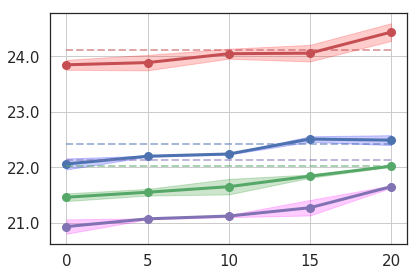

In [22]:
###############################################################
#### Figure 5 in the Appendix #####
###############################################################

save_dir = './figures'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
step = [0, 5, 10, 15, 20]
step = step[::-1]

im_srsgd_error_50 = [24.44, 24.06, 24.05, 23.89, 23.85]
im_srsgd_error_101 = [22.49, 22.51, 22.24, 22.20, 22.06]
im_srsgd_error_152 = [22.02, 21.84, 21.65, 21.55, 21.46]
im_srsgd_error_200 = [21.65, 21.27, 21.12, 21.07, 20.93]

im_srsgd_bar_50 = [0.16, 0.15, 0.09, 0.14, 0.09]
im_srsgd_bar_101 = [0.09, 0.05, 0.01, 0.01, 0.10]
im_srsgd_bar_152 = [0.01, 0.03, 0.14, 0.06, 0.07]
im_srsgd_bar_200 = [0.02, 0.14, 0.02, 0.01, 0.13]


im_srsgd_upper_50 = []
im_srsgd_lower_50 = []
im_srsgd_upper_101 = []
im_srsgd_lower_101 = []
im_srsgd_upper_152 = []
im_srsgd_lower_152 = []
im_srsgd_upper_200 = []
im_srsgd_lower_200 = []


for i in range(len(step)):
    im_srsgd_upper_50.append(im_srsgd_error_50[i] + im_srsgd_bar_50[i])
    im_srsgd_lower_50.append(im_srsgd_error_50[i] - im_srsgd_bar_50[i])
    
    im_srsgd_upper_101.append(im_srsgd_error_101[i] + im_srsgd_bar_101[i])
    im_srsgd_lower_101.append(im_srsgd_error_101[i] - im_srsgd_bar_101[i])
    
    im_srsgd_upper_152.append(im_srsgd_error_152[i] + im_srsgd_bar_152[i])
    im_srsgd_lower_152.append(im_srsgd_error_152[i] - im_srsgd_bar_152[i])
    
    im_srsgd_upper_200.append(im_srsgd_error_200[i] + im_srsgd_bar_200[i])
    im_srsgd_lower_200.append(im_srsgd_error_200[i] - im_srsgd_bar_200[i])
    
    
baseline_50 = [24.11, 24.11, 24.11, 24.11, 24.11]
baseline_101 = [22.42, 22.42, 22.42, 22.42, 22.42]
baseline_152 = [22.03, 22.03, 22.03, 22.03, 22.03]
baseline_200 = [22.13, 22.13, 22.13, 22.13, 22.13]

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()

ax.plot(step, im_srsgd_error_50, 'r-o', linewidth=3, markersize=8, label='ResNet-50')
plt.fill_between(step, im_srsgd_lower_50, im_srsgd_upper_50,
                 color='red', alpha=0.2)

ax.plot(step, baseline_50, 'r--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-50')

ax.plot(step, im_srsgd_error_101, 'b-o', linewidth=3, markersize=8, label='ResNet-101')
plt.fill_between(step, im_srsgd_lower_101, im_srsgd_upper_101,
                 color='blue', alpha=0.2)

ax.plot(step, baseline_101, 'b--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-101')

ax.plot(step, im_srsgd_error_152, 'g-o', linewidth=3, markersize=8, label='ResNet-152')
plt.fill_between(step, im_srsgd_lower_152, im_srsgd_upper_152,
                 color='green', alpha=0.2)

ax.plot(step, baseline_152, 'g--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-152')

ax.plot(step, im_srsgd_error_200, 'm-o', linewidth=3, markersize=8, label='ResNet-200')
plt.fill_between(step, im_srsgd_lower_200, im_srsgd_upper_200,
                 color='magenta', alpha=0.2)

ax.plot(step, baseline_200, 'm--', linewidth=2, markersize=8, alpha=0.5, label='ResNet-200')


plt.setp(ax, xticks=step, xticklabels=step)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid()
fig.show()
fig.savefig('./figures/imagenet_intermediate_epoch_reduction_full_train.pdf')